# imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# load data

In [3]:
data_raw = pd.read_csv('data/clients.csv')

In [4]:
data_raw.head()

,id,gender,age,region_code,policy_sales_channel,id.1,previously_insured,annual_premium,vintage,response,id.2,driving_license,vehicle_age,vehicle_damage
0,1,Male,44,28.0,26.0,1,0,40454.0,217,1,1,1,> 2 Years,Yes
1,2,Male,76,3.0,26.0,2,0,33536.0,183,0,2,1,1-2 Year,No
2,3,Male,47,28.0,26.0,3,0,38294.0,27,1,3,1,> 2 Years,Yes
3,4,Male,21,11.0,152.0,4,1,28619.0,203,0,4,1,< 1 Year,No
4,5,Female,29,41.0,152.0,5,1,27496.0,39,0,5,1,< 1 Year,No


**drop id's columns left by the datasets merge**

In [5]:
data_raw = data_raw.drop(columns=['id.1','id.2'])

In [6]:
data_raw.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'previously_insured', 'annual_premium', 'vintage', 'response',
       'driving_license', 'vehicle_age', 'vehicle_damage'],
      dtype='object')

**Datasets dimensions**

In [7]:
data_raw.shape

(381109, 12)

# Checking data types

In [8]:
data_raw.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

# Checking NA values

In [9]:
data_raw.isnull().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
previously_insured      0
annual_premium          0
vintage                 0
response                0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

# Descriptive Statistical

'id': numerical statistics

'gender': categorical statistics

'age': numerical statistics

'region_code': agroup e and count ids by region 

'policy_sales_channel': categorical statistics

'previously_insured': categorical statistics

'annual_premium': numerical statistics

'vintage': numerical statistics

'response': categorical statistics

'driving_license': categorical statistics

'vehicle_age': numerical statistics


 'vehicle_damage': categorical statistics

In [10]:
df1 = data_raw.copy()

In [11]:
num_atributtes = df1[['id','age','annual_premium', 'vintage']]
cat_atributtes = df1[['gender','policy_sales_channel','region_code','previously_insured','driving_license','vehicle_damage','vehicle_age','response']]

## Numerical statistics

In [12]:
num_statistics = num_atributtes.agg(['max','min','mean','median','std','skew','kurtosis']).T
num_statistics['range'] = num_statistics['max'] - num_statistics['min']
num_statistics = num_statistics[['max','min','range','mean','median','std','skew','kurtosis']]
num_statistics

,max,min,range,mean,median,std,skew,kurtosis
id,381109.0,1.0,381108.0,190555.000000,190555.0,110016.836208,9.443274e-16,-1.200000
age,85.0,20.0,65.0,38.822584,36.0,15.511611,6.725390e-01,-0.565655
annual_premium,540165.0,2630.0,537535.0,30564.389581,31669.0,17213.155057,1.766087e+00,34.004569
vintage,299.0,10.0,289.0,154.347397,154.0,83.671304,3.029517e-03,-1.200688


# Categorical statistics

In [13]:
cat_atributtes

,gender,policy_sales_channel,region_code,previously_insured,driving_license,vehicle_damage,vehicle_age,response
0,Male,26.0,28.0,0,1,Yes,> 2 Years,1
1,Male,26.0,3.0,0,1,No,1-2 Year,0
2,Male,26.0,28.0,0,1,Yes,> 2 Years,1
3,Male,152.0,11.0,1,1,No,< 1 Year,0
4,Female,152.0,41.0,1,1,No,< 1 Year,0
...,...,...,...,...,...,...,...,...
381104,Male,26.0,26.0,1,1,No,1-2 Year,0
381105,Male,152.0,37.0,1,1,No,< 1 Year,0
381106,Male,160.0,30.0,1,1,No,< 1 Year,0
381107,Female,124.0,14.0,0,1,Yes,> 2 Years,0


In [14]:
cat_atributtes.apply(lambda x: x.unique().shape[0])

gender                    2
policy_sales_channel    155
region_code              53
previously_insured        2
driving_license           2
vehicle_damage            2
vehicle_age               3
response                  2
dtype: int64

In [15]:
cat_atributtes[['response']].value_counts().reset_index()

,response,0
0,0,334399
1,1,46710


Variável resposta está desbalanceada

In [27]:
aux = cat_atributtes[['response','gender']].value_counts().reset_index()
aux['_%'] = (round(aux[0]/aux[0].sum()*100,2))

<AxesSubplot:xlabel='gender', ylabel='count'>

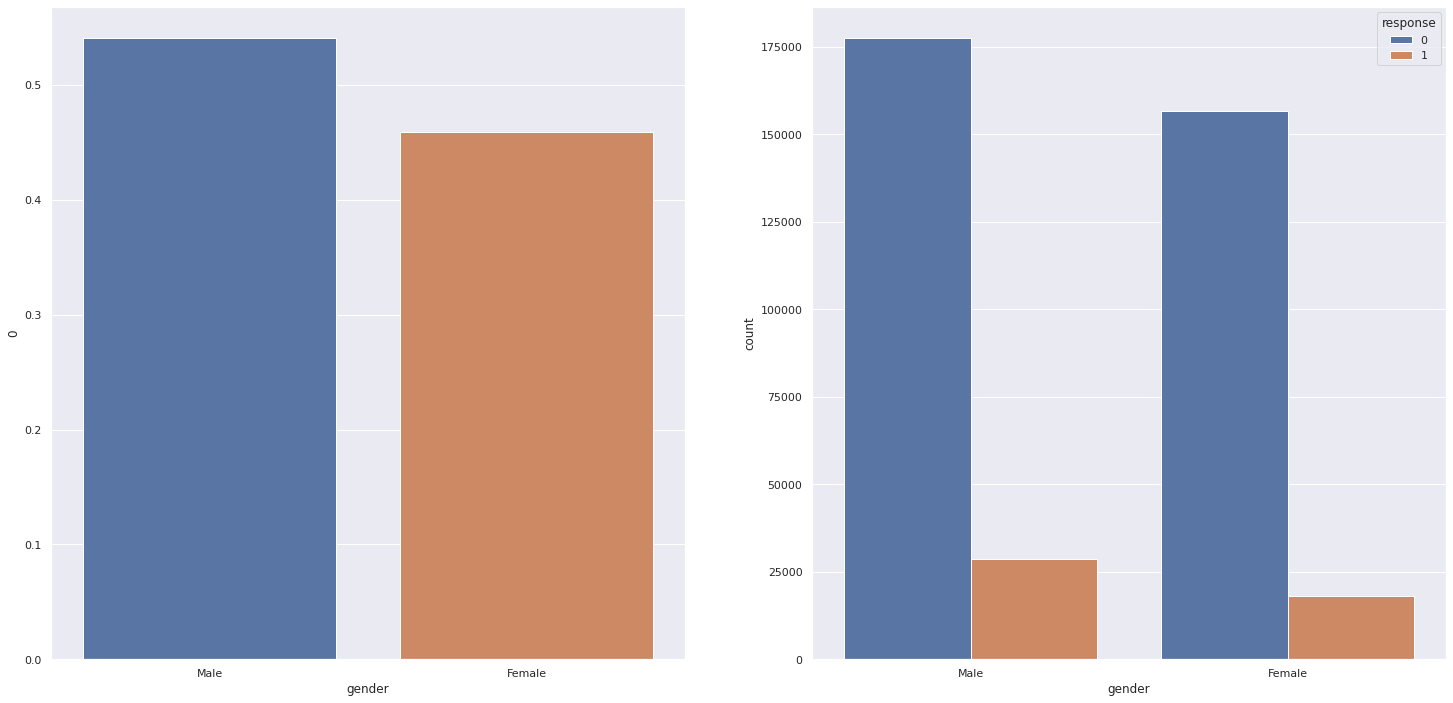

In [19]:
plt.subplot(1,2,1)
sns.barplot(x='gender',y=0,data=cat_atributtes[['gender']].value_counts(normalize=True).reset_index())
plt.subplot(1,2,2)
sns.countplot(x='gender',hue='response',data=cat_atributtes)

In [28]:
aux

,response,gender,0,_%
0,0,Male,177564,46.59
1,0,Female,156835,41.15
2,1,Male,28525,7.48
3,1,Female,18185,4.77


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3161d838-98a4-47ed-ae81-127ad2068af4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>